In [65]:
include("../EuclidElements.jl")

"Euclid's Elements! :D"

# Book 1

## Proposition 13

If a straight line set up on a straight line make angles, it will make either two right angles or angles equal to two right angles.

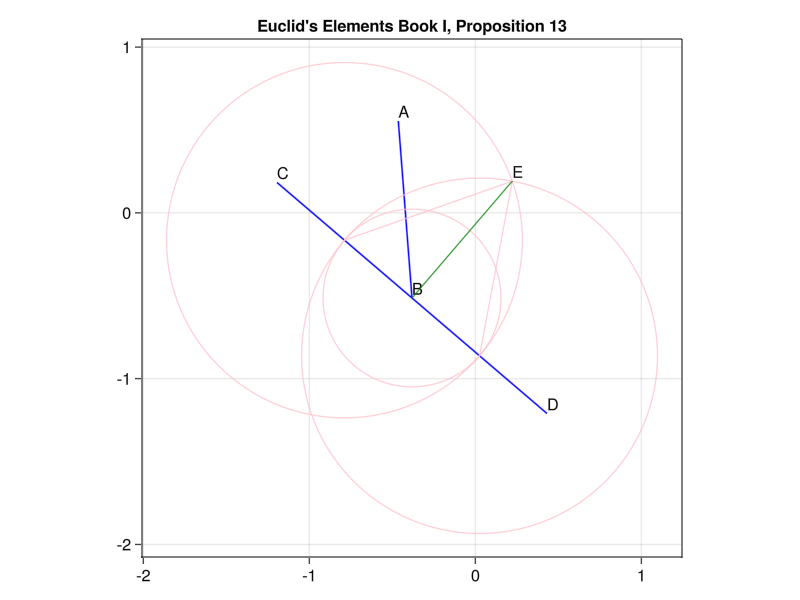

In [69]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 13")

# For let any straight line AB set up on the straight line CD make the angles CBA, ABD;
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))

BA = A-B
BA_θ = vector_angle(B, A)
BA_norm = norm(BA)
C_θ = BA_θ + π/4
C = Point2f0([cos(C_θ); sin(C_θ)] * (BA_norm) + B)
D = continue_line(C, B, BA_norm)

lines!([A,B], color=:blue)
lines!([C,D], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")
text!(D, text="D")

# I say that the angles CBA, ABD are either two right angles or equal to two right angles.

# Now, if the angle CBA is equal to the angle ABD, they are two right angle. [Def. 10]

# But, if not, let BE be drawn from the point B at right angles to CD; [I. 11]
BE_data = perpendicular(C, D, B, color=:pink)
fill_perpendicular(BE_data)
E = Point(BE_data)
BE = straight_line(B, E, color=:green, linewidth=1f0)
fill_line(BE)
text!(E, text="E")

# therefore the angles CBE, EBD are two right angles.

# Then, since the angle CBE is equal to the two angles CBA, ABE,
# let the angle EBD be added to each;
# therefore the angles DBA, ABC are equal to the three angles DBE, EBA, ABC. [C.N. 2]

# Again, since the angle DBA is equal to the two angles DBE, EBA,
# let the angle ABC be added to each;
# therefore the angles DBA, ABC are equal to the three angles DBE, EBA, ABC. [C.N. 2]

# But the angles CBE, EBD were also proved equal to the same three angles;
# and things which are equal to the same thing are also equal to one another; [C.N. 1]
#   therefore the angles CBE, EBD are also equal to the angles DBA, ABC.

# But the angles CBE, EBD are two right angles;
#   therefore the angles DBA, ABC are also equal to two right angles.

# Threfore etc.

# QED

#Draw and show the chart :)
current_figure()

### Animation

In [77]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 13")
xlims!(ax, -2,1.5)
ylims!(ax, -2,1)

# For let any straight line AB set up on the straight line CD make the angles CBA, ABD;
lines!([A,B], color=:blue)
lines!([C,D], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")
text!(D, text="D")

# I say that the angles CBA, ABD are either two right angles or equal to two right angles.

# Now, if the angle CBA is equal to the angle ABD, they are two right angle. [Def. 10]

# But, if not, let BE be drawn from the point B at right angles to CD; [I. 11]
BE_data = perpendicular(C, D, B, color=:pink, linewidth=5f0, cursorwidth=5f0, cursorlw=0.01f0)
E = Point(BE_data)
BE = straight_line(B, E, color=:purple, linewidth=2f0, cursorwidth=0.01f0)
E_opac = Observable(0f0)
text!(E, text="E", color=@lift(RGBA(0,0,0,$E_opac)))

# therefore the angles CBE, EBD are two right angles.

# Then, since the angle CBE is equal to the two angles CBA, ABE,
# let the angle EBD be added to each;
# therefore the angles CBE, EBD are equal to the three angles CBA, ABE, EBD. [C.N. 2]

comp_lw = 5f0

comp_DB_lw = Observable(0f0)
comp_DB = lines!([D,B], color=:green, linewidth=@lift(comp_lw*$comp_DB_lw))

comp_BA_lw = Observable(0f0)
comp_BA = lines!([B, A], color=:green, linewidth=@lift(comp_lw*$comp_BA_lw))

comp_BC_lw = Observable(0f0)
comp_BC = lines!([B, C], color=:green, linewidth=@lift(comp_lw*$comp_BC_lw))

comp_BE_lw = Observable(0f0)
comp_BE = lines!([B, E], color=:green, linewidth=@lift(comp_lw*$comp_BE_lw))

# Again, since the angle DBA is equal to the two angles DBE, EBA,
# let the angle ABC be added to each;
# therefore the angles DBA, ABC are equal to the three angles DBE, EBA, ABC. [C.N. 2]

# But the angles CBE, EBD were also proved equal to the same three angles;
# and things which are equal to the same thing are also equal to one another; [C.N. 1]
#   therefore the angles CBE, EBD are also equal to the angles DBA, ABC.

# But the angles CBE, EBD are two right angles;
#   therefore the angles DBA, ABC are also equal to two right angles.

# Threfore etc.

# QED

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 6f0π, step=6f0π/(d_s*framerate))

record(f, "gifs/Euclid-I-13.01.gif", timestamps; framerate=framerate) do t
    # animate the point letters
    if t <= 2π
        E_opac[] = 0f0
    elseif t > 2π && t <= 2.25π
        E_opac[] = (t-2π)/0.25π
    elseif t > 3π
        E_opac[] = 1f0
    end

    # animate BE background drawing
    animate_perpendicular(BE_data, 0.5π, 2π, t, fade_start=2.5π, fade_end=3π)

    # animate BE
    animate_line(BE, 2.25π, 2.75π, t)

    # animate the comparison lines -- this is a bit of a process ; see comments above
    if t <= 2.75π
        comp_DB_lw[] = 0f0
        comp_BA_lw[] = 0f0 
        comp_BC_lw[] = 0f0 
        comp_BE_lw[] = 0f0
    elseif t > 2.75π && t <= 3π
        comp_DB_lw[] = (t-2.75π)/0.25π
        comp_BA_lw[] = 0f0
        comp_BC_lw[] = (t-2.75π)/0.25π
        comp_BE_lw[] = (t-2.75π)/0.25π
    elseif t > 3π && t <= 3.25π
        comp_DB_lw[] = 1 - (t-3π)/0.25π
        comp_BA_lw[] = 0f0
        comp_BC_lw[] = 1 - (t-3π)/0.25π
        comp_BE_lw[] = 1- (t-2.75π)/0.25π
    elseif t > 3.25π && t <= 3.5π
        comp_DB_lw[] = (t-3.25π)/0.25π
        comp_BA_lw[] = (t-3.25π)/0.25π
        comp_BC_lw[] = (t-3.25π)/0.25π 
        comp_BE_lw[] = (t-3.25π)/0.25π
    elseif t > 3.5π && t <= 3.75π
        comp_DB_lw[] = 1 - (t-3.5π)/0.25π
        comp_BA_lw[] = 1 - (t-3.5π)/0.25π
        comp_BC_lw[] = 1 - (t-3.5π)/0.25π 
        comp_BE_lw[] = 1 - (t-3.5π)/0.25π
    elseif t > 3.75π && t <= 4π
        comp_DB_lw[] = (t-3.75π)/0.25π
        comp_BA_lw[] = (t-3.75π)/0.25π
        comp_BC_lw[] = (t-3.75π)/0.25π
        comp_BE_lw[] = 0f0
    elseif t > 4π && t <= 4.25π
        comp_DB_lw[] = 1 - (t-4π)/0.25π
        comp_BA_lw[] = 1 - (t-4π)/0.25π
        comp_BC_lw[] = 1 - (t-4π)/0.25π
        comp_BE_lw[] = 0f0
    elseif t > 4.25π && t <= 4.5π
        comp_DB_lw[] = (t-4.25π)/0.25π
        comp_BA_lw[] = (t-4.25π)/0.25π
        comp_BC_lw[] = (t-4.25π)/0.25π 
        comp_BE_lw[] = (t-4.25π)/0.25π
    elseif t > 4.5π && t <= 4.75π
        comp_DB_lw[] = 1 - (t-4.5π)/0.25π
        comp_BA_lw[] = 1 - (t-4.5π)/0.25π
        comp_BC_lw[] = 1 - (t-4.5π)/0.25π 
        comp_BE_lw[] = 1 - (t-4.5π)/0.25π
    elseif t > 4.75π && t <= 5π
        comp_DB_lw[] = (t-4.75π)/0.25π
        comp_BA_lw[] = 0f0
        comp_BC_lw[] = (t-4.75π)/0.25π
        comp_BE_lw[] = (t-4.75π)/0.25π
    elseif t > 5π && t <= 5.25π
        comp_DB_lw[] = 1 - (t-5π)/0.25π
        comp_BA_lw[] = 0f0
        comp_BC_lw[] = 1 - (t-5π)/0.25π
        comp_BE_lw[] = 1 - (t-5π)/0.25π
    elseif t > 5.25π && t <= 5.5π
        comp_DB_lw[] = (t-5.25π)/0.25π
        comp_BA_lw[] = (t-5.25π)/0.25π
        comp_BC_lw[] = (t-5.25π)/0.25π 
        comp_BE_lw[] = 0f0
    elseif t > 5.5π && t <= 5.75π
        comp_DB_lw[] = 1 - (t-5.5π)/0.25π
        comp_BA_lw[] = 1 - (t-5.5π)/0.25π
        comp_BC_lw[] = 1 - (t-5.5π)/0.25π 
        comp_BE_lw[] = 0f0
    elseif t > 5.75π
        comp_DB_lw[] = 0f0
        comp_BA_lw[] = 0f0 
        comp_BC_lw[] = 0f0 
        comp_BE_lw[] = 0f0
    end
end;

![animation](gifs/Euclid-I-13.01.gif)